# HW3_3 - Linear classification

Learning contents:
* Least squares for classification
* Perceptron
* Logistic regression
* Extra: multi-class logistic regression

In [1]:
# Dependencies
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set() # this import just makes the plots prettier
import numpy as np

## Data
We'll be working with a dataset of handwritten digits. 
Let visualise some examples.

In [2]:
# We're using a subset of two classes for now
digits = load_digits(n_class=2)

In [3]:
# Handy plotting functions
x_min, x_max = -40, 40
y_min, y_max = -40, 40

def plot_examples():
    show_num = 4
    _, axes = plt.subplots(1, show_num)
    images_and_labels = list(zip(digits.images, digits.target))
    for ax, (image, label) in zip(axes[:], images_and_labels[:show_num]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Label: %i' % label)

def plot_scatter(data, target, n_class=2):
    plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', n_class))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar();
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

def plot_decision_boundary(data, weights):
    raise NotImplementedError("You should fill this is")

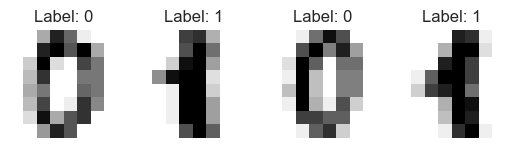

In [4]:
plot_examples()

In [5]:
# The dataset contains 2D data in the form of the `images` attribute, 
# as well as a 1D-version called `data`, where the images have been flattened. 
np.array_equal(digits.images[0].flatten(), digits.data[0])

True

In [6]:
# We can get a 2D version of the data using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data) # this is the representation, we'll be working with

In [7]:
# Out targets are in the set {0,1}
t_01 = digits.target

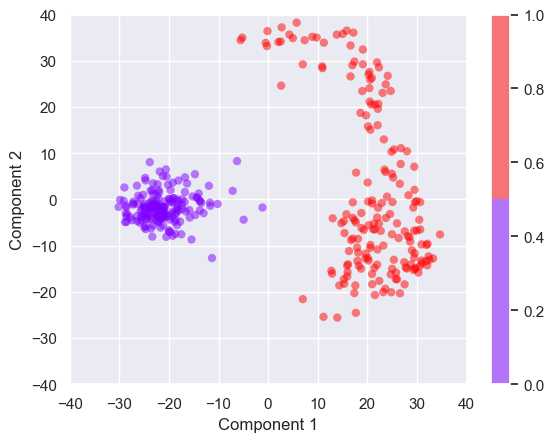

In [8]:
# Let's plot all the data in 2D
plot_scatter(X, t_01)

## 1) Least Squares

### 1.1) Find the weight vector using Least Squares for classification
Hint: Remember to augment the data with a column of 1's

In [9]:
X_augmented = np.hstack((np.ones((X.shape[0], 1)), X))
W = np.linalg.pinv(X_augmented.T.dot(X_augmented)).dot(X_augmented.T).dot(t_01)

### 1.2) Create class predictions using the weight vector
You should be able to correctly classify all data

In [10]:
predictions = X_augmented.dot(W) > 0.5
print("All data classified correctly:", np.all(predictions == t_01))

All data classified correctly: True


### 1.3) Plot the decision boundary 
Hint: You can do this either by plotting a line on the boundary or creating a mesh of all predictions

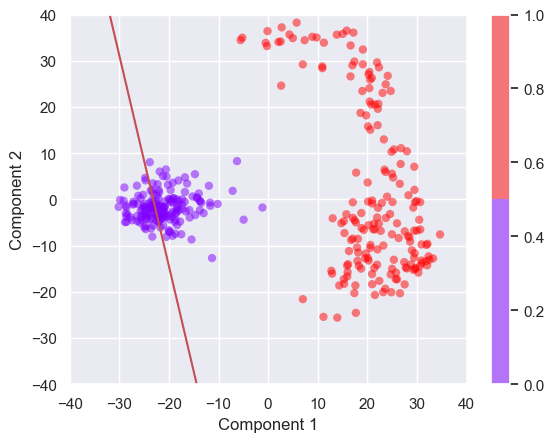

In [11]:
def plot_decision_boundary(data, weights):
    x = np.linspace(x_min, x_max, 500)
    y = -(weights[0] + weights[1] * x) / weights[2]
    plt.figure()
    plot_scatter(data, t_01)
    plt.plot(x, y, 'r')
plot_decision_boundary(X, W)

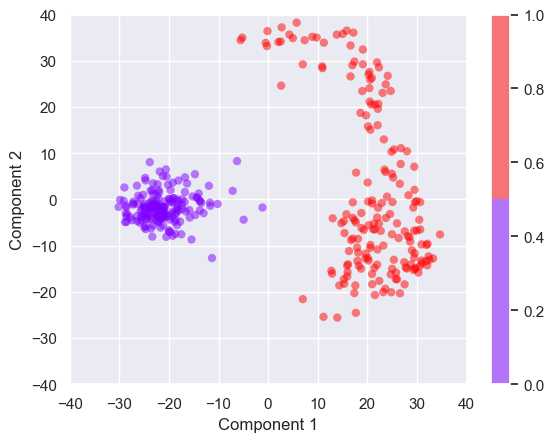

In [12]:
plot_scatter(X, t_01)
# plot_decision_boundary(X, W_least_squares)

## 2) Perceptron

A learning_rate of 0.1 should do the job.
Hint: remember to change the target representation range

In [13]:
lr = 0.1
t_perceptron = np.where(t_01==0, -1, 1)
W_perceptron = np.random.randn(X_augmented.shape[1])
for _ in range(1000): # run for 1000 epochs
    for i in range(X_augmented.shape[0]):
        if t_perceptron[i] != np.sign(X_augmented[i, :].dot(W_perceptron)):
            W_perceptron += lr * t_perceptron[i] * X_augmented[i, :]

### 2.2) Perform class-predictions
Again, you should be able to classify all correctly

In [14]:
predictions = np.sign(X_augmented.dot(W_perceptron))
print("All data classified correctly:", np.all(predictions == t_perceptron))

All data classified correctly: True


### 2.3) Plot the decision boundary

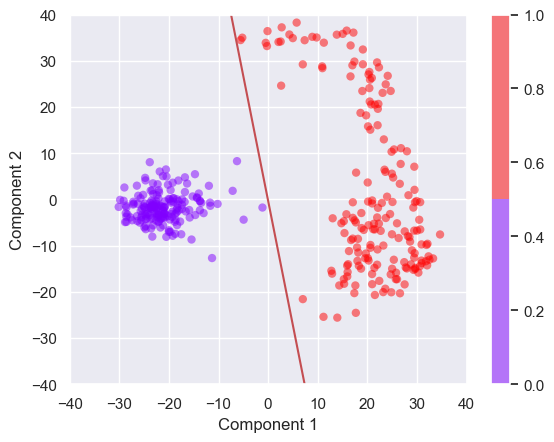

In [15]:
plot_decision_boundary(X, W_perceptron)

## 3) Logistic Regression
### 3.1) Find the weight vector using the Logistic Regression

In [16]:
# initialise W_0 randomly
np.random.seed(42)
W_0 = 2 * np.random.random((1, 3)) -1 # random values in the range [-1,1]

# Our target vectors should be {0, 1}
t_01 = digits.target

In [17]:
from scipy.special import expit as sigmoid
W_logistic = np.random.randn(X_augmented.shape[1])
for _ in range(1000): # run for 1000 epochs
    predictions = sigmoid(X_augmented.dot(W_logistic))
    error = t_01 - predictions
    W_logistic += lr * X_augmented.T.dot(error)

### 3.2) Perform class-predictions

In [18]:
predictions = sigmoid(X_augmented.dot(W_logistic)) > 0.5
print("All data classified correctly:", np.all(predictions == t_01))

All data classified correctly: True


### 3.3) Plot the decision boundary

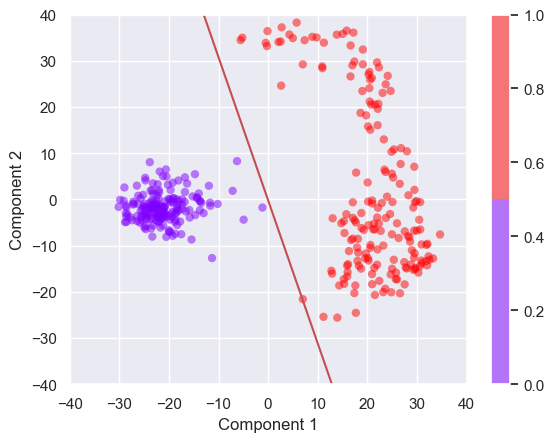

In [19]:
plot_decision_boundary(X, W_logistic)

## 4) Multi-class logistic regression
Repeat 3) but now for multiple classes, i.e. compute the weight matrix, perform predictions (you shold be able to get about 93% accuracy) and plot decision boundaries.

Hint: You will need to use a one-hot encoding of the targets

In [20]:
# Data
n_class = 3
digits = load_digits(n_class=n_class)
pca = PCA(n_components=2)
X_mult = pca.fit_transform(digits.data)

learning_rate = 0.1

# We need to do a one_hot encoding of our data:
# I.e. 0 -> [1,0,0], 1 -> [0,1,0], 2 -> [0,0,1]
def one_hot(targets, n_class=n_class):
    res = np.eye(n_class)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[n_class])

t_oh = one_hot(digits.target, n_class)

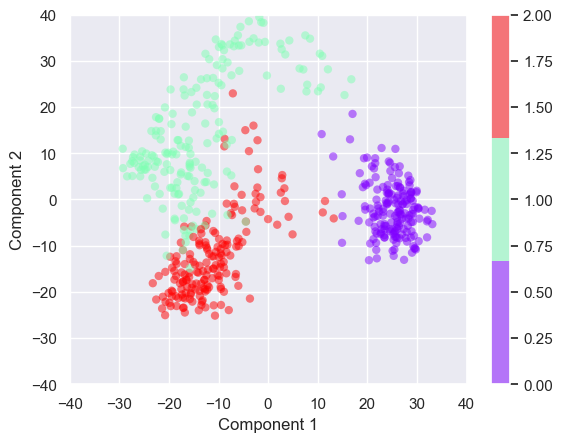

In [21]:
plot_scatter(X_mult, digits.target, n_class=n_class)

In [22]:
W_multiclass = np.random.randn(X_mult.shape[1]+1, n_class)
X_mult_augmented = np.hstack((np.ones((X_mult.shape[0], 1)), X_mult))
for _ in range(5000): # run for 1000 epochs
    predictions = sigmoid(X_mult_augmented.dot(W_multiclass))
    error = t_oh - predictions
    W_multiclass += lr * X_mult_augmented.T.dot(error)

In [23]:
# Perform class predictions
predictions = np.argmax(sigmoid(X_mult_augmented.dot(W_multiclass)), axis=1)
print("Accuracy:", np.mean(predictions == digits.target))

Accuracy: 0.9068901303538175


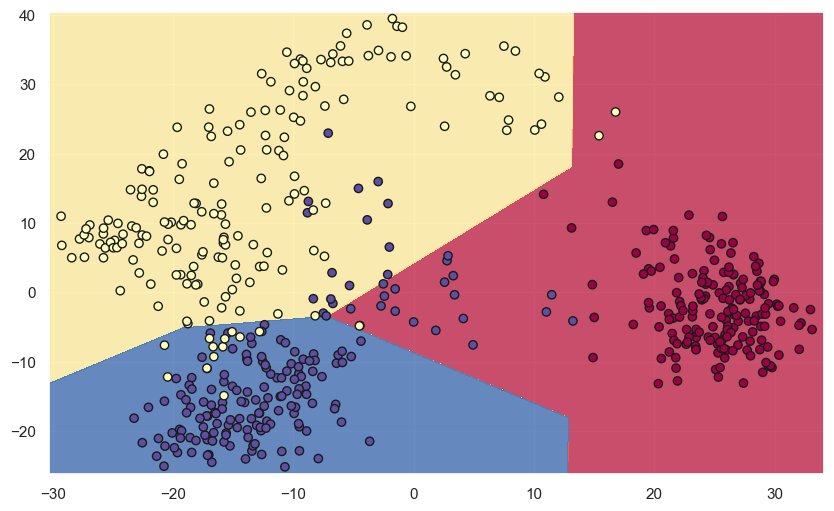

In [24]:
# Multi-class logistic regression decision boundary
def plot_decision_boundary_multiclass(data, weights, target):
    h = .02  # step size in the mesh
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # here "model" is your model's prediction (classification) function
    Z = np.argmax(sigmoid(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()].dot(weights)), axis=1)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # Plot also the training points
    plt.scatter(data[:, 0], data[:, 1], c=target, edgecolors='k', cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
plot_decision_boundary_multiclass(X_mult, W_multiclass, digits.target)

## 5) Multi-class logistic regression on original data representation
Repeat exercise 4), but use the original data representation instead.
You can omit the plots.

Hint: To get 100% accuracy, you can try to:
- Rescale your data to the range [0,1]
- Run 1000 epochs with learning_rate = 0.1

In [25]:
X_original = digits.data / 16.0 
X_original_augmented = np.hstack((np.ones((X_original.shape[0], 1)), X_original))
W_original = np.random.randn(X_original_augmented.shape[1], n_class)
for _ in range(1000): # run for 1000 epochs
    predictions = sigmoid(X_original_augmented.dot(W_original))
    error = t_oh - predictions
    W_original += lr * X_original_augmented.T.dot(error)

# Perform class predictions
predictions = np.argmax(sigmoid(X_original_augmented.dot(W_original)), axis=1)
print("Accuracy:", np.mean(predictions == digits.target))

Accuracy: 1.0
